                Seguro de Saúde 
                
Os conjuntos de dados que vou usar neste projeto contêm dados sobre planos de saúde e odontológicos oferecidos a indivíduos e pequenas empresas por meio do US Health Insurance Marketplace. Esses dados foram originalmente preparados e divulgados pelo Centers for Medicare & Medicaid Services (CMS), que faz parte do Departamento de Saúde e Serviços Humanos dos EUA (HHS).

Data Wrangling


vou utilizar dois conjuntos de dados: 1- Taxa de conjunto de dados e 2- Conjunto de dados de atributos do plano

In [1]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

%matplotlib inline

Lendo o DataSet

In [2]:
Rate_Raw = pd.read_csv("Rate.csv")
Rate_Raw.head(3)

,BusinessYear,StateCode,IssuerId,SourceName,VersionNum,ImportDate,IssuerId2,FederalTIN,RateEffectiveDate,RateExpirationDate,...,IndividualRate,IndividualTobaccoRate,Couple,PrimarySubscriberAndOneDependent,PrimarySubscriberAndTwoDependents,PrimarySubscriberAndThreeOrMoreDependents,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents,RowNumber
0,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,29.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,14
2,2014,AK,21989,HIOS,6,2014-03-19 07:06:49,21989,93-0438772,2014-01-01,2014-12-31,...,36.95,NaN,73.9,107.61,107.61,107.61,144.56,144.56,144.56,15


escolhendo os recursos que vou utilizar

In [11]:
Rate_Data = Rate_Raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','Age','IndividualRate','Couple',
                    'CoupleAndOneDependent','CoupleAndTwoDependents','CoupleAndThreeOrMoreDependents']]
Rate_Data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


exportando outro quadro de dados que esta em outro arquivo

In [16]:
teste=Rate_Data.to_csv("Rate_Date.csv")

Agora leio o conjunto de dados de atributos do plano

In [5]:
PlanAttributes_Raw = pd.read_csv("PlanAttributes.csv")
PlanAttributes_Raw.head(3)

/home/rielson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,7,8,9,10,11,12,13,14,15,18,19,20,22,23,24,25,26,27,28,29,31,32,33,34,39,40,41,42,66,67,68,70,71,72,75,76,77,79,80,81,82,84,85,86,88,89,90,92,93,94,96,97,98,136,137,138,140,141,142,145,146,147,150,151,152,154,155,156,158,159,160,162,163,164,166,167,168) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,AVCalculatorOutputNumber,BeginPrimaryCareCostSharingAfterNumberOfVisits,BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays,BenefitPackageId,BusinessYear,CSRVariationType,ChildOnlyOffering,ChildOnlyPlanId,CompositeRatingOffered,DEHBCombInnOonFamilyMOOP,...,TEHBOutOfNetFamilyMOOP,TEHBOutOfNetFamilyPerGroupMOOP,TEHBOutOfNetFamilyPerPersonMOOP,TEHBOutOfNetIndividualMOOP,TIN,URLForEnrollmentPayment,URLForSummaryofBenefitsCoverage,UniquePlanDesign,VersionNum,WellnessProgramOffered
0,NaN,0,0,1,2014,Standard Low Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
1,NaN,0,0,1,2014,Standard Low On Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN
2,NaN,0,0,1,2014,Standard High Off Exchange Plan,Allows Adult and Child-Only,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,93-0438772,https://www.modahealth.com/employers/enroll.shtml,https://www.modahealth.com/producers/grp/den.s...,NaN,6,NaN


Escolhendo os recursos que vou utilizar

In [6]:
PlanAttributes_Data=PlanAttributes_Raw[['BusinessYear','StateCode','IssuerId','ImportDate','PlanId','MetalLevel',
                                        'TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']]
PlanAttributes_Data.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Exportando o quadro de dados que está em outro arquivo

In [7]:
PlanAttributes_Data.to_csv("PlanAttributes_data.csv")

Avaliando o conjunto de dados

Agora posso utilizar o arquivo Rate_Data diretamente

In [18]:
RateData=pd.read_csv("Rate_Date.csv")
RateData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Limpando os dados com taxa acima de 9.000

In [19]:
RateData[RateData.IndividualRate>9000].IndividualRate.unique()

array([999999.  ,   9999.  ,   9999.99])

In [20]:
RateData = RateData[RateData.IndividualRate < 9000]
RateData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0010001,0-20,29.00,NaN,NaN,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Vou fazer a análise dos planos opções familiares, por isso que eu exclui todos os planos que são para idades especiais

In [21]:
RateData_FO = RateData[RateData.Age == "Family Option"]
RateData_FO.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
5,5,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


Vou mudar a coluna ImportDate para date time

In [23]:
RateData_FO['ImportDate']=RateData_FO['ImportDate'].apply(pd.to_datetime)

/home/rielson/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Como não vou utilizar a coluna Unnamed: 0 vou apagar

In [30]:
RateData_FO=RateData_FO.drop(RateData_FO[['Unnamed: 0']], 1)
RateData_FO.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,Age,IndividualRate,Couple,CoupleAndOneDependent,CoupleAndTwoDependents,CoupleAndThreeOrMoreDependents
1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56
5,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001,Family Option,36.95,73.9,144.56,144.56,144.56


O conjunto de dados Rate é adequado para ser utilizado na visualização e na previsão

In [31]:
RateData_FO_1=RateData_FO
RateData_FO_2=RateData_FO
RateData_FO_3=RateData_FO

Plan Attributes Dataset

### Fazendo a limpeza dos dados Plan Attributes

lendos os dados

In [59]:
PlanAttributesData = pd.read_csv("PlanAttributes_data.csv")
PlanAttributesData.head(3)

/home/rielson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Existe alguns dados invaliddos na caluna TEHBInnTier1FamilyMOOP verificando se existe informações validas

In [74]:
PlanAttributesData.TEHBInnTier1FamilyMOOP.unique()

array([99999999, '12700', '8000', '0', '9500', '12000', '10400', '2500',
       '1000', '10000', '1500', '7000', '3000', '12600', '6000', '3500',
       '2900', '2000', '4000', '12500', '11000', '9600', '9000', '4500',
       '5500', '2200', '2800', '1150', '1240', '5000', '2350', '8500',
       '5400', '8400', '1600', '800', '5200', '1200', '2400', '4200',
       '6400', '3800', '7200', '6500', '2300', '1300', '9200', '8800',
       '11500', '2700', '5300', '10500', '4300', '1400', '950', '7300',
       '5840', '9800', '8200', '3400', '5600', '7500', '6250', '7050',
       '6300', '4700', '3200', '9300', '1100', '10200', '10300', '7700',
       '3100', '9750', '9100', '12200', '4400', '9400', '7400', '11200',
       '700', '400', '2600', '4600', '3300', '7900', '11400', '10600',
       '3600', '5900', '8300', '1700', '6800', '5350', '1660', '11600',
       '4230', '10160', '8250', '1508', '7600', '900', '500', '600',
       '10360', '3700', '9700', '5800', '3750', '7800', '8700', '390

Existe alguns caracteres do $ dólar e ','. Agora vou limpar esses dados

In [61]:
PlanAttributesData['TEHBInnTier1FamilyMOOP']=PlanAttributesData['TEHBInnTier1FamilyMOOP'].str.replace('$','').str.replace(',','')
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP
0,0,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-00,Low,NaN,NaN
1,1,2014,AK,21989,2014-03-19 07:06:49,21989AK0020002-01,Low,NaN,NaN
2,2,2014,AK,21989,2014-03-19 07:06:49,21989AK0020001-00,High,NaN,NaN


Apagando todas as linhas que não são aplicaveis

In [75]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[PlanAttributesData['TEHBInnTier1FamilyMOOP']=='Not Applicable'].index)

Excluindo todos os NAN

In [76]:
PlanAttributesData['TEHBInnTier1FamilyMOOP']=PlanAttributesData['TEHBInnTier1FamilyMOOP'].fillna(99999999)

In [77]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[PlanAttributesData['TEHBInnTier1FamilyMOOP']==99999999].index)

Mudando a coluna ImportDate para date time

In [78]:
PlanAttributesData['ImportDate']=PlanAttributesData['ImportDate'].apply(pd.to_datetime)

Alterando o TEHBInnTier1FamilyMOOP para Family_Up_Limit

In [79]:
PlanAttributesData['Family_Up_Limit']=''

In [81]:
for x in PlanAttributesData.index:
    PlanAttributesData.ix[x,"Family_Up_Limit"]=float(PlanAttributesData.ix[x,'TEHBInnTier1FamilyMOOP'])
PlanAttributesData['Family_Up_Limit']=PlanAttributesData['Family_Up_Limit'].astype(int)

Alterando TEHBInnTier1IndividualMOOP para Individual_Up_Limit

In [82]:
PlanAttributesData['TEHBInnTier1IndividualMOOP']=PlanAttributesData['TEHBInnTier1IndividualMOOP'].str.replace('$','').str.replace(',','')
PlanAttributesData['Individual_Up_Limit']=''
for x in PlanAttributesData.index:
    PlanAttributesData.ix[x,"Individual_Up_Limit"]=float(PlanAttributesData.ix[x,'TEHBInnTier1IndividualMOOP'])
PlanAttributesData['Individual_Up_Limit']=PlanAttributesData['Individual_Up_Limit'].astype(int) # Transfer object to int
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,TEHBInnTier1FamilyMOOP,TEHBInnTier1IndividualMOOP,Family_Up_Limit,Individual_Up_Limit
6,6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350,12700,6350
7,7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000,8000,4000
8,8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000,8000,4000


Apagando as colunas que não vão ser uteis

In [83]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[['TEHBInnTier1FamilyMOOP','TEHBInnTier1IndividualMOOP']],1)
PlanAttributesData.head(3)

,Unnamed: 0,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit
6,6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350
7,7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000
8,8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000


In [84]:
PlanAttributesData=PlanAttributesData.drop(PlanAttributesData[['Unnamed: 0']],1)
PlanAttributesData.head(3)

,BusinessYear,StateCode,IssuerId,ImportDate,PlanId,MetalLevel,Family_Up_Limit,Individual_Up_Limit
6,2014,AK,73836,2014-04-18 11:49:29,73836AK0650002-00,Bronze,12700,6350
7,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-00,Gold,8000,4000
8,2014,AK,73836,2014-04-18 11:49:29,73836AK0680004-01,Gold,8000,4000


In [85]:
PlanAttributesData_1=PlanAttributesData
PlanAttributesData_2=PlanAttributesData
PlanAttributesData_3=PlanAttributesData

### Visualização

In [86]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="ticks")
from pylab import rcParams
%matplotlib inline
matplotlib.style.use('ggplot')
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

### Análise Family Up Limit (KDE)


Observando os dados pude ver que tem algumas familias que pagam os seus planos de saúde com o seu proprio dinheiro. Vamos analisar esses dados com o KDE.

(0, 13500)

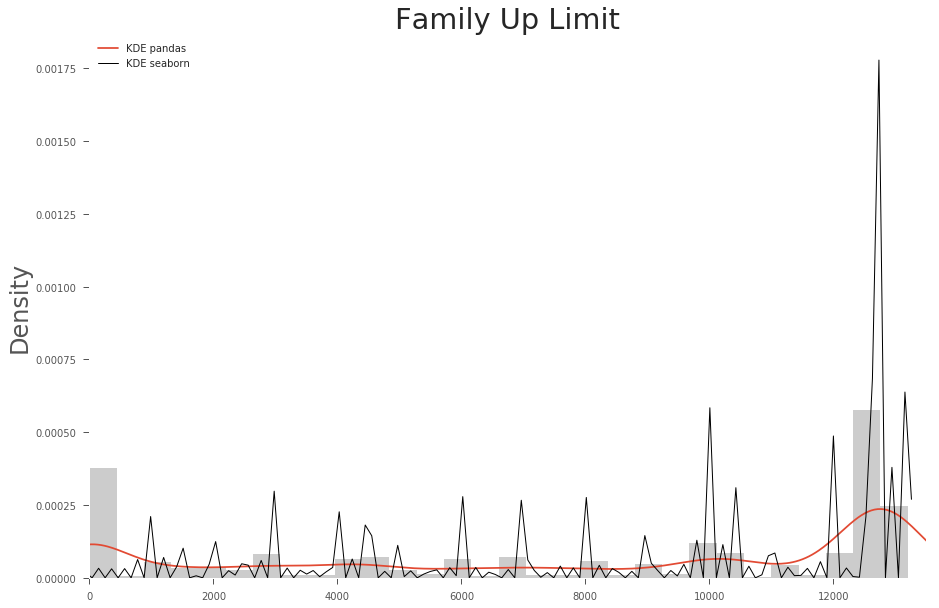

In [87]:
fig, ax = plt.subplots(figsize=(15,10))
PlanAttributesData_3.Family_Up_Limit.hist(bins=30, normed=True, alpha=0.4, color='grey')
PlanAttributesData_3.Family_Up_Limit.plot(kind='kde', title='Family Up Limit', label='KDE pandas')
sns.kdeplot(PlanAttributesData_3.Family_Up_Limit, bw=20, color='black', lw=1.0, label='KDE seaborn')
plt.xlim([0,13500])

##### Como mostra o gráfico do KDE os limites 0 são de pessoas que não podem pagar por um plano. podemos observar que a maioria dos limites é superior a 12000, o que significa que os seguradores focam em planos high-end. Talvez seja por isso que os americanos gastam muito dinheiro em seguro de saúde.

Vamos verificar entre os anos 

In [88]:
date_object1 = pd.to_datetime(PlanAttributesData_1['ImportDate'])
PlanAttributesData_1['weekday'] = date_object1.dt.dayofweek
PlanAttributesData_1['month'] = date_object1.dt.month
PlanAttributesData_1['year'] = date_object1.dt.year
PlanAttributesData_1['hour'] = date_object1.dt.hour
PlanAttributesData_1['minute'] = date_object1.dt.minute
PlanAttributesData_1['second'] = date_object1.dt.second

Vamos utilizar o GroupBy para obter os valores medianos entre os anos

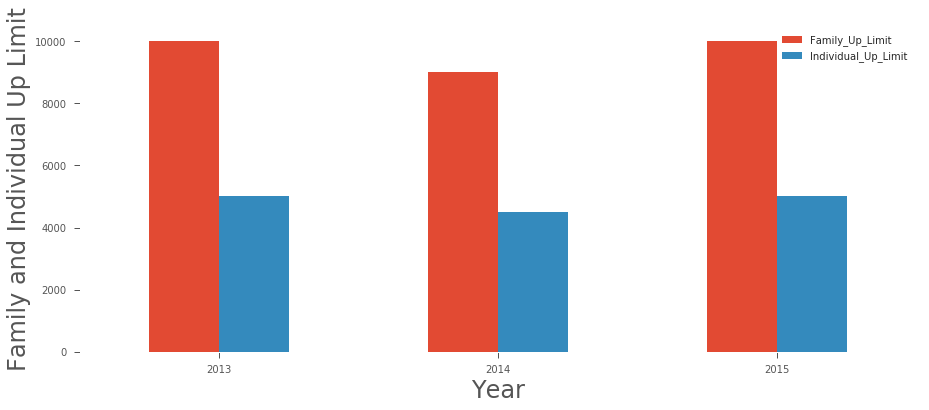

In [89]:
p = PlanAttributesData_1.groupby('year').median()[["Family_Up_Limit", "Individual_Up_Limit"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("Year"), p.set_ylabel("Family and Individual Up Limit"), p.legend(["Family_Up_Limit", "Individual_Up_Limit"])